In [2]:
# Importing Libraries and Packages
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 

In [3]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-white.csv')
df1 = df.dropna()
df2 = df1.values

In [4]:
# Separating Dataset into Features and Target Variables
# X: (First 11 Columns)
# y: (Column 12)
X = df2[:, :11]
y = df2[:, 11]


In [5]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)
print(x_train.shape)
print(x_test.shape)

(3918, 11)
(980, 11)


In [6]:
#Finding RSS/TSS/R-Squared for Training Data 
# Fitting Data Into Regression Object
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

# Predicting output based on fitted model
y_hat = regr.predict(x_train)

# Measuring Error
RSS = np.sum((y_hat-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS

print("RSS:",RSS)
print("TSS:",TSS)
print("R^2 = {0:f}".format(1-RSS/TSS))



RSS: 2246.672787645948
TSS: 3067.9254721796833
R^2 = 0.267690


In [7]:
#Instead using the method above where values were
#continuous, we decided to round our yhat values 
#accordingly 
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_hat_round = np.around(regr.predict(x_train))


# Measuring Error
RSS = np.sum((y_hat_round-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS
print("R-square value (rounded):",Rsq)

acc_train_round = np.mean(y_hat_round == y_train)
print("Accuracy for training set (rounded):", acc_train_round)


R-square value (rounded): 0.1577370364984344
Accuracy for training set (rounded): 0.5173557937723329


In [8]:
#Test Data, Not Rounded 
y_hat_test = regr.predict(x_test)

RSS = np.sum((y_hat_test-y_test)**2)
TSS = np.sum((y_test-np.mean(y_test))**2)
Rsq = 1 - RSS/TSS

print("RSS:",RSS)
print("TSS:",TSS)
print("R^2 = {0:f}".format(1-RSS/TSS))


RSS: 513.3280565427083
TSS: 770.5551020408163
R^2 = 0.333820


In [9]:
#Test Data, Rounded 
y_hat_test_rounded = np.around(y_hat_test)

acc_train_round = np.mean(y_hat_test_rounded == y_test)
print("Accuracy:",acc_train_round)

Accuracy: 0.5224489795918368


Ridge Regression: Train Set
Alpha: 0 	 Accuracy(Train): 0.5173557937723329
Alpha: 0.001 	 Accuracy(Train): 0.5173557937723329
Alpha: 0.01 	 Accuracy(Train): 0.5173557937723329
Alpha: 0.1 	 Accuracy(Train): 0.5173557937723329
Alpha: 10 	 Accuracy(Train): 0.5155691679428279
Alpha: 100 	 Accuracy(Train): 0.514037774374681
Alpha: 10000 	 Accuracy(Train): 0.4543134252169474
Alpha: 1000000 	 Accuracy(Train): 0.45176110260336905


Ridge Regression: Test Set
Alpha: 0 	 Accuracy(Test): 0.5224489795918368
Alpha: 0.001 	 Accuracy(Test): 0.5224489795918368
Alpha: 0.01 	 Accuracy(Test): 0.5224489795918368
Alpha: 0.1 	 Accuracy(Test): 0.523469387755102
Alpha: 10 	 Accuracy(Test): 0.5214285714285715
Alpha: 100 	 Accuracy(Test): 0.5183673469387755
Alpha: 10000 	 Accuracy(Test): 0.44081632653061226
Alpha: 1000000 	 Accuracy(Test): 0.43673469387755104


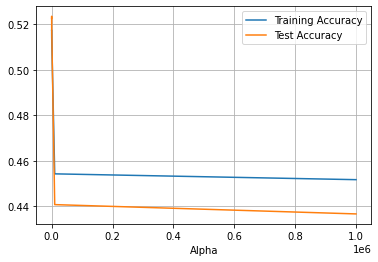

In [10]:
#Ridge Regression
alpha_vals = [0, 0.001, 0.01, 0.1, 10, 100, 10000, 1000000]

acc_train_ridgereg = []
acc_test_ridgereg = []

print("Ridge Regression: Train Set")
for alpha in alpha_vals: 
    regr_ridge = linear_model.Ridge(alpha)
    regr_ridge.fit(x_train, y_train)
    y_hat_ridge = regr_ridge.predict(x_train)
    y_hat_ridge_rounded = np.around(y_hat_ridge)
    acc_train_ridge = np.mean(y_hat_ridge_rounded == y_train)
    acc_train_ridgereg.append(acc_train_ridge)
    print("Alpha:",alpha,"\t","Accuracy(Train):",acc_train_ridge)

print('\n')

print("Ridge Regression: Test Set")
for alpha in alpha_vals: 
    regr_ridge = linear_model.Ridge(alpha)
    regr_ridge.fit(x_train, y_train)
    y_hat_ridge_test = regr_ridge.predict(x_test)
    y_hat_ridge_rounded_test = np.around(y_hat_ridge_test)
    acc_test_ridge = np.mean(y_hat_ridge_rounded_test == y_test)
    acc_test_ridgereg.append(acc_test_ridge)
    print("Alpha:",alpha,"\t","Accuracy(Test):",acc_test_ridge)


# Plot (Alpha Vs. Accuracy)
plt.plot(alpha_vals, acc_train_ridgereg, alpha_vals, acc_test_ridgereg)
plt.grid()
plt.xlabel('Alpha')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [16]:
#Lasso Regression
lasso_train = []
print("Lasso Regression, Train Set")
for alpha in alpha_vals: 
    regr_lasso = linear_model.Lasso(alpha)
    regr_lasso.fit(x_train, y_train)
    y_hat_lasso = regr_lasso.predict(x_train)
    y_hat_lasso_rounded = np.around(y_hat_lasso)
    acc_train_lasso = np.mean(y_hat_lasso_rounded == y_train)
    lasso_train.append(acc_train_lasso)
    print("Alpha:",alpha,"\t","Accuracy (Train):",acc_train_lasso)

print()

lasso_test = []
print("Lasso Regression, Test Set")
for alpha in alpha_vals:
    regr_lasso = linear_model.Lasso(alpha)
    regr_lasso.fit(x_train, y_train)
    y_hat_lasso_test = regr_lasso.predict(x_test)
    y_hat_lasso_rounded_test = np.around(y_hat_lasso_test)
    acc_lasso_test = np.mean(y_hat_lasso_rounded_test == y_test)
    lasso_test.append(acc_lasso_test)
    print("Alpha:",alpha,"\t","Accuracy(Test):",acc_lasso_test,";")



Lasso Regression, Train Set
Alpha: 0 	 Accuracy (Train): 0.5173557937723329
Alpha: 0.001 	 Accuracy (Train): 0.5163348647269015
Alpha: 0.01 	 Accuracy (Train): 0.5171005615109749
Alpha: 0.1 	 Accuracy (Train): 0.4821337417049515
Alpha: 10 	 Accuracy (Train): 0.45176110260336905
Alpha: 100 	 Accuracy (Train): 0.45176110260336905
Alpha: 10000 	 Accuracy (Train): 0.45176110260336905
Alpha: 1000000 	 Accuracy (Train): 0.45176110260336905

Lasso Regression, Test Set
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

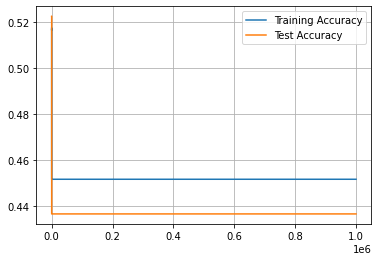

In [12]:
#Plotting the Test and Train accuracies for Lasso Regression
plt.plot(alpha_vals, lasso_train,'-')
plt.plot(alpha_vals, lasso_test,'-')
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [13]:
#Polynomial Tranform 
poly = PolynomialFeatures(degree=5)
x_train_poly = poly.fit_transform(x_train)
regr_poly = linear_model.LinearRegression()
regr_poly.fit(x_train,y_train)
y_hat_train_poly = regr_poly.predict(x_train)

RSS = np.sum((y_hat_train_poly-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS
print(y_hat_train_poly)

y_hat_train_poly_round = np.around(y_hat_train_poly)
acc_train_poly = np.mean(y_hat_train_poly_round == y_train)
print(acc_train_poly)

[6.19468342 4.5916518  6.15586029 ... 6.7725482  5.68076197 5.63364751]
0.5173557937723329


In [17]:
#Feature transform with a Bayesian Model + Ridge Regression
reg_bayesian = linear_model.BayesianRidge()
reg_bayesian.fit(x_train, y_train)
y_hat_bay = reg_bayesian.predict(x_train)
#print(y_hat_bay)

RSS = np.sum((y_hat_bay-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS
print("R^2:",Rsq)
print("RSS:",RSS)
print("TSS:",TSS)

y_hat_train_bay_round = np.around(y_hat_bay)
acc_train_bay = np.mean(y_hat_train_bay_round == y_train)
print("Accuracy for Bayesian Model (Train):",acc_train_bay)

R^2: 0.26753725829327113
RSS: 2247.1411027046415
TSS: 3067.9254721796833
Accuracy for Bayesian Model (Train): 0.5155691679428279


In [15]:
#Accuracy for Bayesian Model (Test)
y_hat_bay_test = reg_bayesian.predict(x_test)
y_hat_test_bay_round = np.around(y_hat_bay_test)
acc_test_bay = np.mean(y_hat_test_bay_round == y_test)
print("Accuracy for Bayesian Model (Test):",acc_test_bay)

Accuracy for Bayesian Model (Test): 0.5224489795918368
